<a href="https://colab.research.google.com/github/ThriSowmya/BigMart-Product-Outlet-Sales-Analysis/blob/main/img_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

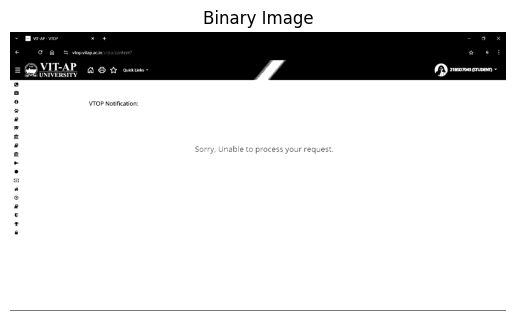

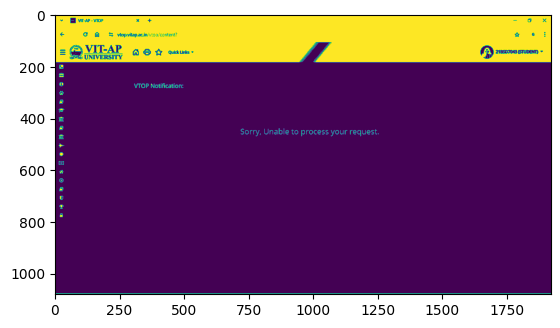

In [66]:
#####Simulation and display of an image, negative of an image(Binary and Grayscale).

import numpy as np

import cv2

import matplotlib.pyplot as plt

img = cv2.imread('/content/Screenshot (3).png')

# negative orignal img1=255-img plt.imshow(img1) #RGB Image

rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

rgb.shape

plt.imshow(rgb)

#GRAY SCALE IMAGE

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray.shape

plt.imshow(gray,cmap='gray')

#NEGATIVE GRAY SCALE IMAGE

gray1=255-gray

plt.imshow(gray1)

# Convert the image to binary scale

_, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # Display the binary image

plt.imshow(binary_image, cmap='gray')

plt.title('Binary Image')

plt.axis('off')
plt.show()

#NEGATIVE BINARY SCALE IMAGE

binary_image1= 255-binary_image
plt.imshow(binary_image1)

Neighborhood of pixel at (100, 50):
[[7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]]


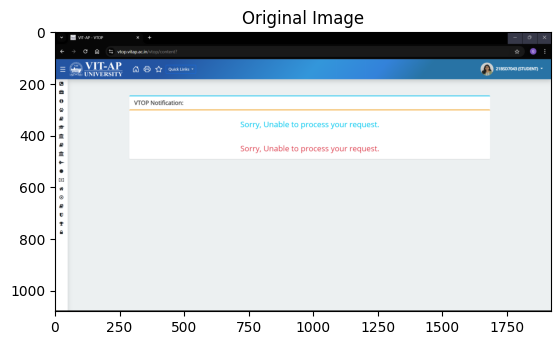

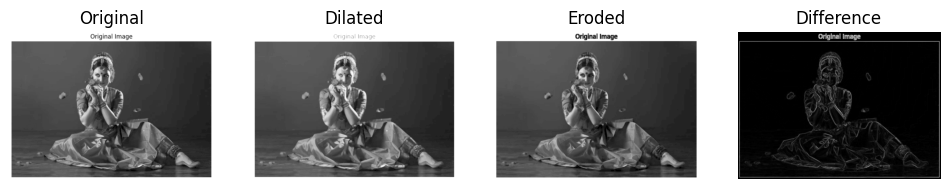

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/Screenshot 2024-12-07 224522.png', 0)

# Define pixel relationship operations
# Neighborhood (8-connectivity)
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(image, kernel, iterations=1)
eroded = cv2.erode(image, kernel, iterations=1)

difference = cv2.absdiff(dilated, eroded)

# Display original, dilated, eroded, and difference images
images = [image, dilated, eroded, difference]
titles = ["Original", "Dilated", "Eroded", "Difference"]

plt.figure(figsize=(12, 6))
for i, (img, title) in enumerate(zip(images, titles), 1):
    plt.subplot(1, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()

In [70]:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('/content/Screenshot 2024-12-07 224522.png', 0)

# Neighbourhood relationship (4-connected pixels)
neighbours = [(1, 0), (-1, 0), (0, 1), (0, -1)]
rows, cols = image.shape
neighbour_diff = np.zeros_like(image)
for r in range(1, rows-1):
    for c in range(1, cols-1):
        neighbour_diff[r, c] = sum(abs(int(image[r, c]) - int(image[r+dr, c+dc])) for dr, dc in neighbours)

# Co-Occurrence Matrix
comatrix = greycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = greycoprops(comatrix, 'contrast')[0, 0]

# Pixel Labelling (Thresholding)
pixel_labels = (image > image.mean()).astype(int)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Neighbour Intensity Diff")
plt.imshow(neighbour_diff, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Co-Occurrence Contrast")
plt.text(0.5, 0.5, f"Contrast: {contrast:.2f}", ha='center', va='center', fontsize=12)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Pixel Labelling")
plt.imshow(pixel_labels, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


ImportError: cannot import name 'greycomatrix' from 'skimage.feature' (/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py)

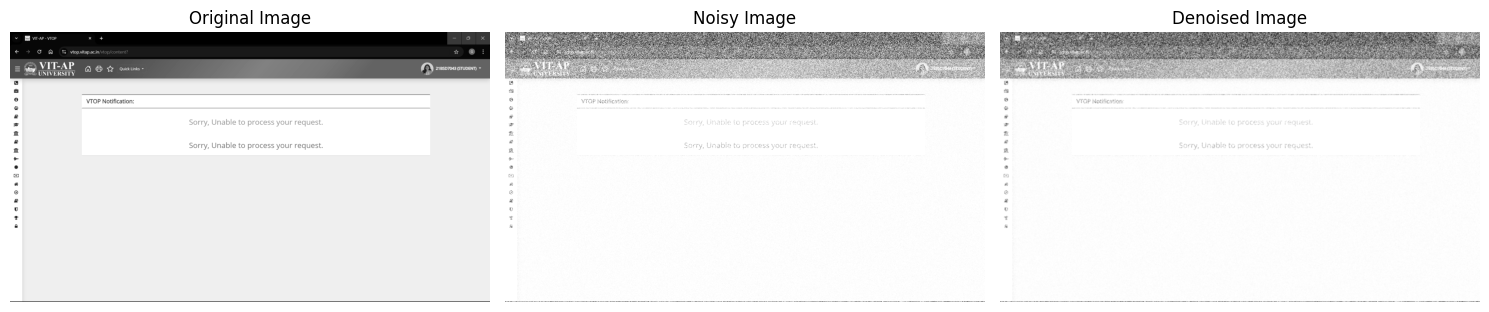

In [ ]:
###REMOVE NOISE FROM THE IMAGE

import numpy as np

import cv2

import matplotlib.pyplot as plt


# Load the image

image = cv2.imread('/content/Screenshot (3).png', cv2.IMREAD_COLOR)


# Convert the image to grayscale (optional, for simplicity)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Add Gaussian noise to the image (simulated noise)

noise = np.random.normal(0, 25, gray_image.shape).astype(np.uint8)

noisy_image = cv2.add(gray_image, noise)


# Apply Gaussian blur to remove noise

denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)


# Display the images

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)

plt.title("Original Image")

plt.imshow(gray_image, cmap='gray')

plt.axis('off')


plt.subplot(1, 3, 2)

plt.title("Noisy Image")

plt.imshow(noisy_image, cmap='gray')

plt.axis('off')


plt.subplot(1, 3, 3)

plt.title("Denoised Image")

plt.imshow(denoised_image, cmap='gray')

plt.axis('off')


plt.tight_layout()

plt.show()

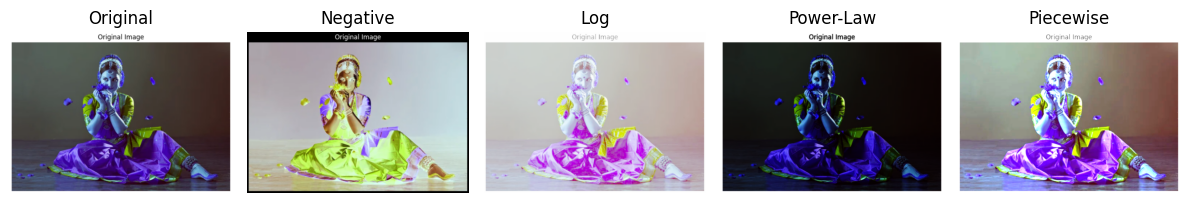

In [ ]:
##EXPERIMENT 3
###Image – Intensity Transformations

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/Screenshot 2024-12-07 224522.png')

# 1. Negative Transformation
negative = 255 - img

# 2. Log Transformation
log_trans = np.uint8(255 * np.log1p(img) / np.log(256))

# 3. Power-Law Transformation
gamma = 2.0  # Change gamma value as needed
power_law = np.uint8(255 * ((img / 255.0) ** gamma))

# 4. Piecewise Linear Transformation
def piecewise_linear(x):
    if x < 128: return 2 * x
    else: return 255
piecewise = np.vectorize(piecewise_linear)(img).astype(np.uint8)

# Display results
titles = ['Original', 'Negative', 'Log', 'Power-Law', 'Piecewise']
images = [img, negative, log_trans, power_law, piecewise]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


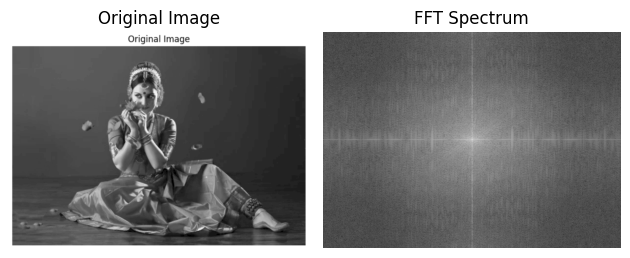

In [ ]:
##2D FFT SHORTCUT

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('/content/Screenshot 2024-12-07 224522.png', cv2.IMREAD_GRAYSCALE)

# Apply 2D FFT and shift the zero frequency component to the center
fft = np.fft.fft2(img)
fft_shift = np.fft.fftshift(fft)

# Calculate magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fft_shift))

# Display original image and FFT magnitude spectrum
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('FFT Spectrum'), plt.axis('off')
plt.tight_layout()
plt.show()


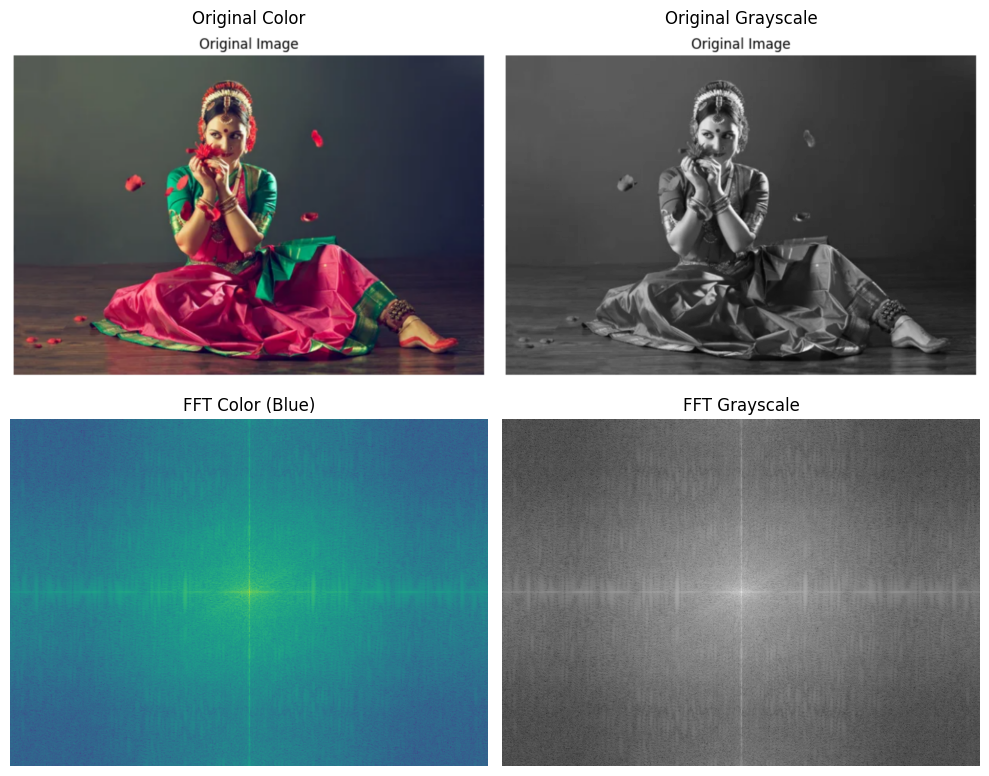

In [ ]:
####2D FFT OF AN IMAGE

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
img_color = cv2.imread('/content/Screenshot 2024-12-07 224522.png')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# 2D FFT for grayscale
fft_gray = np.fft.fftshift(np.fft.fft2(img_gray))
magnitude_gray = 20 * np.log(np.abs(fft_gray))

# 2D FFT for color (only blue channel for simplicity)
fft_color = np.fft.fftshift(np.fft.fft2(img_color[:, :, 0]))
magnitude_color = 20 * np.log(np.abs(fft_color))

# Display results
titles = ['Original Color', 'Original Grayscale', 'FFT Color (Blue)', 'FFT Grayscale']
images = [cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB), img_gray, magnitude_color, magnitude_gray]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray' if i % 2 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


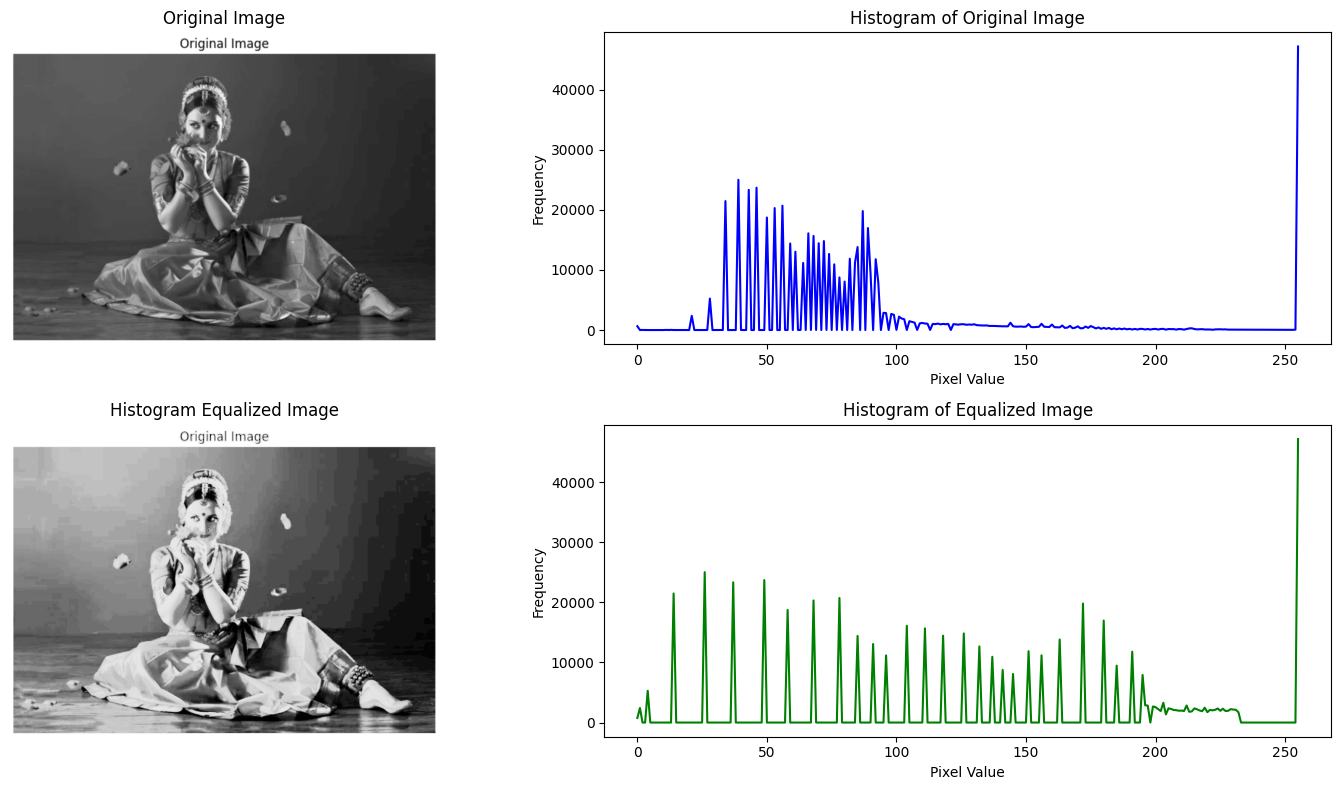

In [ ]:
##Histogram Equivalization
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the original image in grayscale
image_path = '/content/Screenshot 2024-12-07 224522.png' # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Perform histogram equalization
equalized_image = cv2.equalizeHist(original_image)
# Calculate histograms
original_hist = cv2.calcHist([original_image], [0], None, [256], [0, 256])
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
# Plot the results
plt.figure(figsize=(15, 8))
# Original Image
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
# Histogram of Original Image
plt.subplot(2, 2, 2)
plt.plot(original_hist, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
# Histogram of Equalized Image
plt.subplot(2, 2, 4)
plt.plot(equalized_hist, color='green')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
# Show the plots
plt.tight_layout()
plt.show()

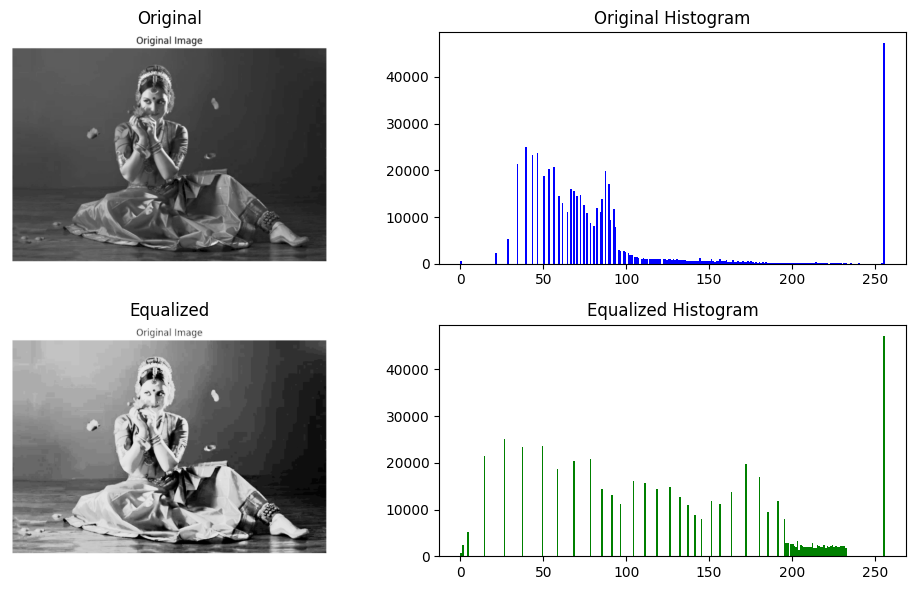

In [ ]:
##HISTOGRAM EQUILIZATION SHORT CUT
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and apply histogram equalization
img = cv2.imread('/content/Screenshot 2024-12-07 224522.png', cv2.IMREAD_GRAYSCALE)
equalized_img = cv2.equalizeHist(img)

# Plot original and equalized images with histograms
plt.figure(figsize=(10, 6))

# Original Image and Histogram
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(2, 2, 2), plt.hist(img.ravel(), 256, [0, 256], color='blue'), plt.title('Original Histogram')

# Equalized Image and Histogram
plt.subplot(2, 2, 3), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized'), plt.axis('off')
plt.subplot(2, 2, 4), plt.hist(equalized_img.ravel(), 256, [0, 256], color='green'), plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()


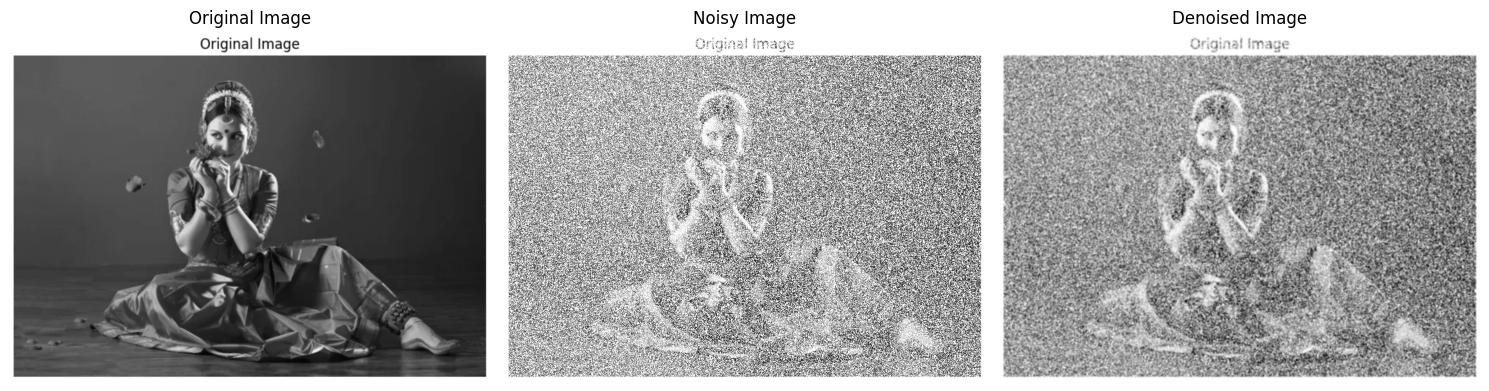

In [59]:
###REMOVE NOISE FROM THE IMAGE

import numpy as np
import cv2
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('/content/Screenshot 2024-12-07 224522.png', cv2.IMREAD_COLOR)
# Convert the image to grayscale (optional, for simplicity)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Add Gaussian noise to the image (simulated noise)
noise = np.random.normal(0, 25, gray_image.shape).astype(np.uint8)
noisy_image = cv2.add(gray_image, noise)
# Apply Gaussian blur to remove noise
denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Denoised Image")
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


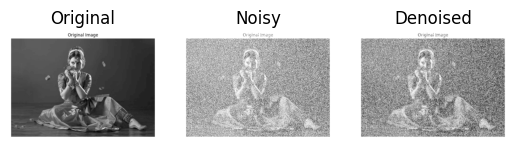

In [65]:
### noise  removal

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Screenshot 2024-12-07 224522.png', 0)
noisy_image = cv2.add(image, np.random.normal(0, 25, image.shape).astype(np.uint8))
denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

for i, (title, img) in enumerate(zip(["Original", "Noisy", "Denoised"], [image, noisy_image, denoised_image]), 1):
    plt.subplot(1, 3, i)
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


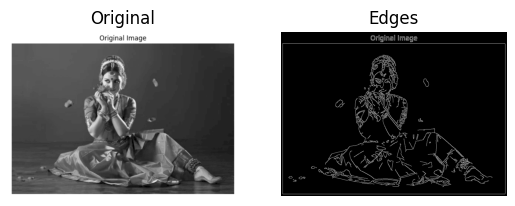

In [62]:
#edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Screenshot 2024-12-07 224522.png', 0)
edges = cv2.Canny(image, 100, 200)

for i, (title, img) in enumerate(zip(["Original", "Edges"], [image, edges]), 1):
    plt.subplot(1, 2, i)
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


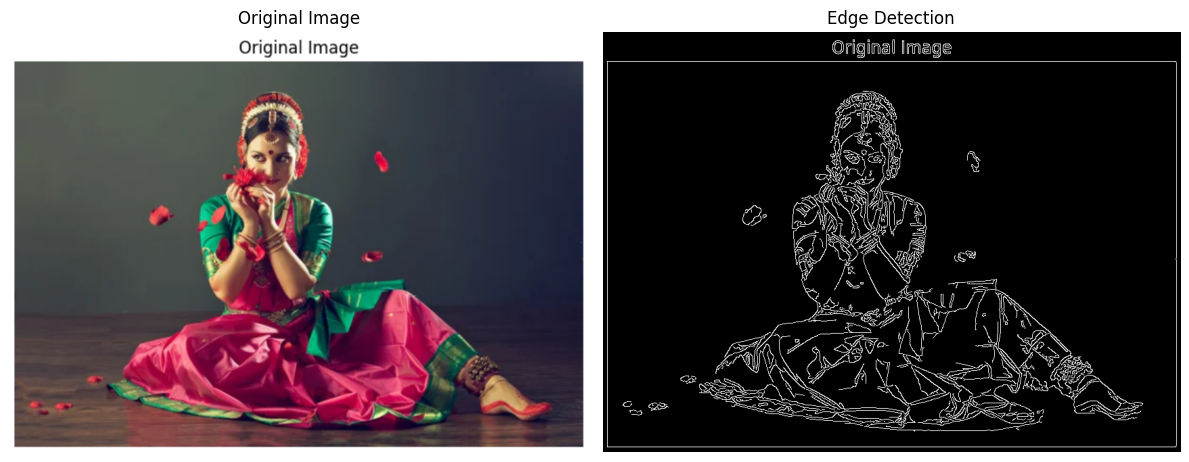

In [64]:
###EXPERIMENT 7
####Perform Edge detection of an image
import cv2
import matplotlib.pyplot as plt
# Read the image in color
image = cv2.imread('/content/Screenshot 2024-12-07 224522.png') # Replace 'your_image.jpg' with your file path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB for displaying
#in matplotlib
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Perform edge detection using the Canny method
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)
# Plot the original image and edge-detected image
plt.figure(figsize=(12, 6))
# Show the original image in color
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
# Show the edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.tight_layout()
plt.show()

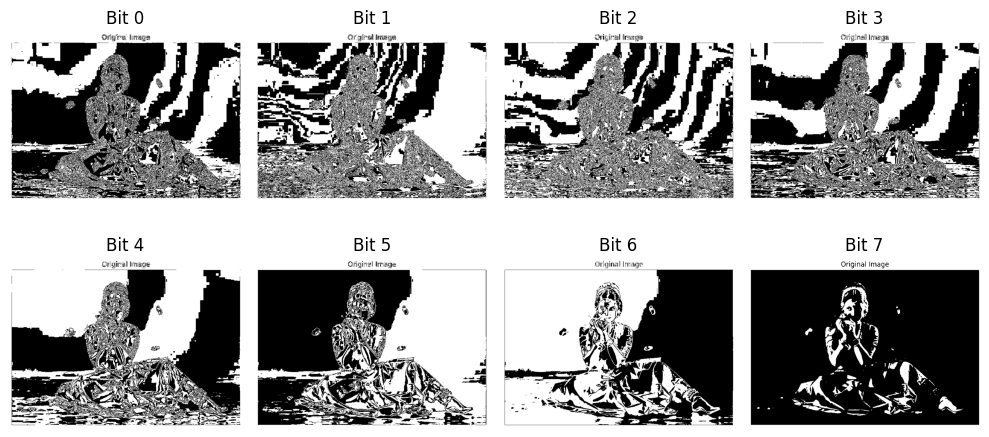

In [79]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('/content/Screenshot 2024-12-07 224522.png', 0)

# Extract bit planes
bit_planes = [(image >> i) & 1 for i in range(8)]

# Display bit planes
plt.figure(figsize=(10, 5))
for i, plane in enumerate(bit_planes):
    plt.subplot(2, 4, i + 1)
    plt.title(f"Bit {i}")
    plt.imshow(plane, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()